In [0]:
!mkdir -p /content/data/
!wget --no-check-certificate \
  https://www.dropbox.com/s/e2xya1pzr2tm9xr/QUT_fish_data.zip\
  -O /content/data/QUT_fish_data.zip

--2019-11-13 07:58:01--  https://www.dropbox.com/s/e2xya1pzr2tm9xr/QUT_fish_data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/e2xya1pzr2tm9xr/QUT_fish_data.zip [following]
--2019-11-13 07:58:01--  https://www.dropbox.com/s/raw/e2xya1pzr2tm9xr/QUT_fish_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5b2d9c4fe2bb637882bf1aa8f9.dl.dropboxusercontent.com/cd/0/inline/AsRYH794ySnZRRv_nloWKD7QDm_rWII23ycO8kXpXE3y5SgZZC3eojk8dZq5K1OeNh4vGrO5Ui7TTslCTdUU1xQUniqpEmzja2NDcSDFOtkFWA/file# [following]
--2019-11-13 07:58:02--  https://uc5b2d9c4fe2bb637882bf1aa8f9.dl.dropboxusercontent.com/cd/0/inline/AsRYH794ySnZRRv_nloWKD7QDm_rWII23ycO8kXpXE3y5SgZZC3eojk8dZq5K1OeNh4vGrO5Ui7TTslCTdUU1xQUniqpEmzja2NDcSDFOtkFWA/file
R

In [0]:
!wget --no-check-certificate \
  https://www.dropbox.com/s/p2a4rwv9x8cf78a/not_fish_data.zip?dl= \
  -O /content/data/not_fish_data.zip

--2019-11-13 07:59:03--  https://www.dropbox.com/s/p2a4rwv9x8cf78a/not_fish_data.zip?dl=
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p2a4rwv9x8cf78a/not_fish_data.zip [following]
--2019-11-13 07:59:03--  https://www.dropbox.com/s/raw/p2a4rwv9x8cf78a/not_fish_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b60d3aafb34c2d7f6250ac768.dl.dropboxusercontent.com/cd/0/inline/AsRd32A3E1K6Ijl3YrwuLJ3N3X6dO4gHZrgOfoG4OyvRgNS5BfJHvcgNIyBCHpd9ZTEWTouMQi5C0hAiCAUzF8F_UtFAFxj3CRAaPMF4ehwZG9g6RToJjR666WQ4NajWTrc/file# [following]
--2019-11-13 07:59:04--  https://uc8b60d3aafb34c2d7f6250ac768.dl.dropboxusercontent.com/cd/0/inline/AsRd32A3E1K6Ijl3YrwuLJ3N3X6dO4gHZrgOfoG4OyvRgNS5BfJHvcgNIyBCHpd9ZTEWTouMQi5C0hAiCAUzF8F_UtFA

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np
from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
import random
from shutil import copyfile

local_zip = '/content/data/QUT_fish_data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()

try:
    os.mkdir('/content/data/images')
    os.mkdir('/content/data/images/training')
    os.mkdir('/content/data/images/testing')
    os.mkdir('/content/data/images/training/pos')
    os.mkdir('/content/data/images/testing/pos')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


FISH_SOURCE_DIR = "/content/data/QUT_fish_data/images/raw_images/"
TRAINING_FISH_DIR = "/content/data/images/training/pos/"
TESTING_FISH_DIR = "/content/data/images/testing/pos/"

split_size = .7
split_data(FISH_SOURCE_DIR, TRAINING_FISH_DIR, TESTING_FISH_DIR, split_size)

print(len(os.listdir('/content/data/images/training/pos/')))
print(len(os.listdir('/content/data/images/testing/pos/')))

3084
1322


In [0]:
local_zip = '/content/data/not_fish_data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()

try:
    os.mkdir('/content/data/images/training/neg')
    os.mkdir('/content/data/images/testing/neg')
except OSError:
    pass

NoFISH_SOURCE_DIR = "/content/data/not_fish/"
TRAINING_NoFISH_DIR = "/content/data/images/training/neg/"
TESTING_NoFISH_DIR = "/content/data/images/testing/neg/"

split_size = .7
split_data(NoFISH_SOURCE_DIR, TRAINING_NoFISH_DIR, TESTING_NoFISH_DIR, split_size)

print(len(os.listdir('/content/data/images/training/neg/')))
print(len(os.listdir('/content/data/images/testing/neg/')))

2795
1198


In [0]:
tf.keras.backend.clear_session()

base_model = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3), pooling=None )


'''for layer in base_model.layers:
      layer.trainable = False'''
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense  (1, activation='sigmoid')(x)
model = Model(base_model.input, x)
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.2,
      zoom_range=-0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/data/images/training/',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=28,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/data/images/testing',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=24,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5878 images belonging to 2 classes.
Found 2520 images belonging to 2 classes.


In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/10
Epoch 1/10
100/100 - 107s - loss: 0.0521 - acc: 0.9786 - val_loss: 0.6087 - val_acc: 0.8925
Epoch 2/10
Epoch 1/10
100/100 - 86s - loss: 0.0610 - acc: 0.9843 - val_loss: 0.0222 - val_acc: 0.9967
Epoch 3/10
Epoch 1/10
100/100 - 87s - loss: 0.0361 - acc: 0.9911 - val_loss: 0.3094 - val_acc: 0.9642
Epoch 4/10
Epoch 1/10
100/100 - 87s - loss: 0.0266 - acc: 0.9904 - val_loss: 0.0271 - val_acc: 0.9958
Epoch 5/10
Epoch 1/10
100/100 - 88s - loss: 0.0250 - acc: 0.9914 - val_loss: 0.0163 - val_acc: 0.9942
Epoch 6/10
Epoch 1/10
100/100 - 87s - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0319 - val_acc: 0.9967
Epoch 7/10
Epoch 1/10
100/100 - 87s - loss: 0.0281 - acc: 0.9929 - val_loss: 0.1733 - val_acc: 0.9783
Epoch 8/10
Epoch 1/10
100/100 - 87s - loss: 0.0427 - acc: 0.9911 - val_loss: 0.9520 - val_acc: 0.9758
Epoch 9/10
Epoch 1/10
100/100 - 88s - loss: 0.0354 - acc: 0.9911 - val_loss: 0.0657 - val_acc: 0.9925
Epoch 10/10
Epoch 1/10
100/100 - 87s - loss: 0.0243 - acc: 0.9939 - val_loss: 0.1

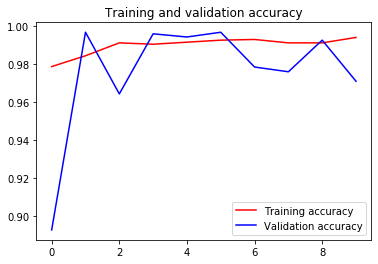

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(256, 256))
  
  x=image.img_to_array(img)/255
  #print(x.shape())
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  
  print(classes)

  if classes>0.5:
    print(fn + " ther is a fish")
    
  else:
    print(fn + " ther is no fish")
 

Saving f01.png to f01 (1).png
Saving f1.jpg to f1 (1).jpg
Saving f02.jpg to f02 (1).jpg
Saving f2.jpg to f2 (1).jpg
Saving f03.jpg to f03 (1).jpg
Saving f3.jpg to f3 (1).jpg
Saving f04.jpg to f04 (1).jpg
Saving f4.jpg to f4 (1).jpg
Saving f05.jpg to f05 (1).jpg
Saving f5.jpg to f5 (1).jpg
Saving f06.jpg to f06 (1).jpg
Saving f6.jpg to f6 (1).jpg
Saving f07.jpg to f07 (1).jpg
Saving f7.jpg to f7 (1).jpg
Saving f08.jpg to f08 (1).jpg
Saving f8.jpg to f8 (1).jpg
Saving f09.jpg to f09 (1).jpg
Saving f9.jpg to f9 (1).jpg
Saving f10_cat.jpg to f10_cat.jpg
Saving f11_brid.jpg to f11_brid.jpg
Saving f12_Wolf8.jpg to f12_Wolf8.jpg
Saving f13_notfish.jpg to f13_notfish.jpg
Saving f14_dog.jpg to f14_dog.jpg
Saving f15_dog2.jpg to f15_dog2.jpg
Saving f16_notfish.jpg to f16_notfish.jpg
Saving f17_dog3.jpg to f17_dog3.jpg
[[1.]]
f01.png ther is a fish
[[1.]]
f1.jpg ther is a fish
[[1.]]
f02.jpg ther is a fish
[[1.]]
f2.jpg ther is a fish
[[1.]]
f03.jpg ther is a fish
[[1.]]
f3.jpg ther is a fish
[[1